In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from numpy import linalg as la
import seaborn as sns
import pylab
import scipy.stats as stats
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from libsvm.svmutil import *

# Binary Classification

## For 25 features and class (0,1)

In [101]:
df = pd.read_csv('feat_25.csv',header=None)
df.head()
# pf.ProfileReport(df)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.611354,-0.045663,0.727172,1.595320,-1.271234,-0.690236,-0.599780,-0.171765,-0.410593,0.093257,...,2.305684,-0.638212,0.334267,-0.362362,0.535002,-0.667933,0.853424,0.081133,-0.371929,0.0
1,0.329049,-0.993766,-1.059930,-0.122622,-2.267921,1.807015,-0.372976,0.220776,0.086480,0.898155,...,-0.537503,0.955448,0.881130,0.285619,0.473293,-0.236010,-1.653255,0.530019,0.991707,0.0
2,3.133718,-0.337506,-0.086044,0.236076,-1.600311,0.856172,1.118946,-1.594933,1.067100,0.531846,...,-0.086037,0.108791,0.569087,-1.778828,-0.150031,0.439892,-0.798792,0.008227,0.256486,0.0
3,2.542200,-0.133352,0.657973,0.966862,-2.346200,-0.621942,-0.244499,-0.975664,1.257898,0.605799,...,1.070091,-1.026265,0.894831,-0.572277,0.912929,-0.733433,-0.571943,0.665086,-0.681933,0.0
4,1.748424,0.120212,-1.593389,-0.331676,0.683001,0.053492,0.846797,-0.079228,0.319719,-1.433890,...,1.651151,0.429377,0.281321,0.259342,0.593774,1.207045,1.559338,0.228422,-0.830659,0.0


Text(0, 0.5, 'Number')

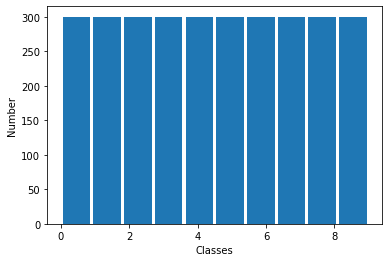

In [106]:
plt.hist(df[25],rwidth=0.9)
plt.xlabel('Classes')
plt.ylabel('Number')

<AxesSubplot:>

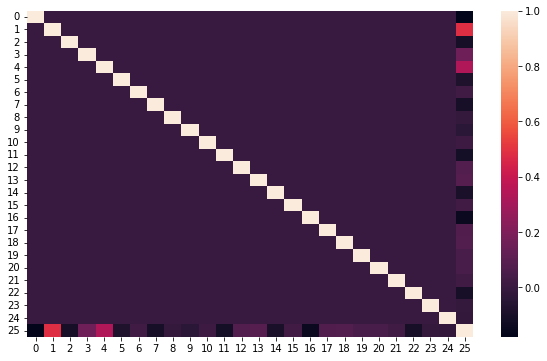

In [111]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr())

In [3]:
df1 = df[df[25]<=1]
X = np.array(df1.drop(columns=25,axis=1))
y = np.array(df1[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [4]:
def validation(X_train,y_train,X_test,y_test,kernel,c,gamma,degree):
    for i in kernel:
        if i==0:
            for j in c:
                text = f"-s 0 -c {j} -t 0"
                param = svm_parameter(text)
                prob = svm_problem(y_train,X_train)
                model = svm_train(prob,param)
                p1,p2,p3=svm_predict(y_test,X_test,model)
                print(f'Kernel: Linear,  C : {j}, accuracy: {p2[0]}')
            print("  ")
            print("  ")

        elif i ==1:
            for j in c:
                for k in degree:
                    text = f"-s 0 -c {j} -t 1 -d {k}"
                    param = svm_parameter(text)
                    prob = svm_problem(y_train,X_train)
                    model = svm_train(prob,param)
                    p1,p2,p3=svm_predict(y_test,X_test,model)
                    print(f'Kernel: Polynomial,  C : {j}, degree : {k}, accuracy: {p2[0]}')
                print("  ")
            print("  ")

        elif i ==2:
            for j in c:
                for k in gamma:
                    text = f"-s 0 -c {j} -t 2 -g {k}"
                    param = svm_parameter(text)
                    prob = svm_problem(y_train,X_train)
                    model = svm_train(prob,param)
                    p1,p2,p3=svm_predict(y_test,X_test,model)
                    print(f'Kernel: rbf,  C : {j}, gamma : {k}, accuracy: {p2[0]}')
                print("  ")
                print("  ")

        elif i==3:
            for j in c:
                for k in gamma:
                    text = f"-s 0 -c {j} -t 3 -g {k}"
                    param = svm_parameter(text)
                    prob = svm_problem(y_train,X_train)
                    model = svm_train(prob,param)
                    p1,p2,p3=svm_predict(y_test,X_test,model)
                    print(f'Kernel: Sigmoid,  C : {j}, gamma: {k} accuracy: {p2[0]}')

In [5]:
c = [0.1,1,10,100]
gamma = [0.01,0.1,1]
kernel = [0,1,2,3]
degree = [1,2,3,4,5,6]

In [6]:
validation(X_train,y_train,X_test,y_test,kernel,c,gamma,degree)

Accuracy = 100% (180/180) (classification)
Kernel: Linear,  C : 0.1, accuracy: 100.0
Accuracy = 100% (180/180) (classification)
Kernel: Linear,  C : 1, accuracy: 100.0
Accuracy = 100% (180/180) (classification)
Kernel: Linear,  C : 10, accuracy: 100.0
Accuracy = 100% (180/180) (classification)
Kernel: Linear,  C : 100, accuracy: 100.0
  
  
Accuracy = 99.4444% (179/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 1, accuracy: 99.44444444444444
Accuracy = 100% (180/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 2, accuracy: 100.0
Accuracy = 96.6667% (174/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 3, accuracy: 96.66666666666667
Accuracy = 83.8889% (151/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 4, accuracy: 83.88888888888889
Accuracy = 73.3333% (132/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 5, accuracy: 73.33333333333333
Accuracy = 62.7778% (113/180) (classification)
Kernel: Polynomial,  C : 0.1, degree : 6,

In [7]:
param_grid1 = {'C': [0.1,1,10,100], 
              'gamma': [0.01,0.1,1],
              'kernel': ['rbf','linear','poly','sigmoid'],
             'degree':[1,2,3,4]}

In [8]:
clf = GridSearchCV(SVC(),param_grid=param_grid1, cv=5)

In [9]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3, 4],
                         'gamma': [0.01, 0.1, 1],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid']})

In [10]:
clf.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

In [11]:
clf.cv_results_

{'mean_fit_time': array([0.00419297, 0.00079112, 0.00278635, 0.00439949, 0.00379004,
        0.00099735, 0.00120144, 0.00198393, 0.00478077, 0.00099611,
        0.00079885, 0.00299225, 0.00339098, 0.00059886, 0.00358901,
        0.00379105, 0.00339184, 0.00100307, 0.00159659, 0.00219955,
        0.00478811, 0.00099759, 0.00099092, 0.00299711, 0.00338616,
        0.00079794, 0.00339208, 0.00398335, 0.00339022, 0.00080328,
        0.00198979, 0.00199561, 0.00478716, 0.00079651, 0.00178976,
        0.00299144, 0.00338488, 0.00099735, 0.00339155, 0.00398893,
        0.00339074, 0.0009975 , 0.00199432, 0.00198913, 0.00498562,
        0.00099792, 0.00199475, 0.00299196, 0.0013906 , 0.00099735,
        0.0011919 , 0.00139632, 0.00299745, 0.00079856, 0.00079222,
        0.0009973 , 0.00519176, 0.0009975 , 0.00100293, 0.00239944,
        0.00119009, 0.00079784, 0.00259285, 0.00160165, 0.00338902,
        0.00079784, 0.00139618, 0.00059848, 0.00538945, 0.00079789,
        0.00119686, 0.00219927,

In [12]:
clf.score(X_test,y_test)

0.9944444444444445

## For 10 features and class (0,1)

In [13]:
df2 = df[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,25]]
df3 = df2[df2[25]<=1]
X = np.array(df3.drop(columns=25,axis=1))
y = np.array(df3[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
model = SVC(C=0.1,gamma=0.01)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9944444444444445

In [15]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

1.0

In [16]:
clf.best_params_

{'C': 0.1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [17]:
clf.cv_results_

{'mean_fit_time': array([0.00319853, 0.00079918, 0.00259824, 0.00399499, 0.00198898,
        0.000598  , 0.00099716, 0.00179586, 0.00438771, 0.00079155,
        0.00039859, 0.00278678, 0.00339098, 0.00059843, 0.00299788,
        0.00399432, 0.0019949 , 0.00059843, 0.00159669, 0.00159588,
        0.00438867, 0.00059919, 0.0011961 , 0.00319118, 0.00339007,
        0.0006043 , 0.00299168, 0.00299201, 0.00179529, 0.00059834,
        0.00179491, 0.00159664, 0.0043889 , 0.00059805, 0.00099707,
        0.00279317, 0.00318441, 0.00039902, 0.00299282, 0.00398898,
        0.00180016, 0.00059819, 0.00179448, 0.00159569, 0.00478768,
        0.00059829, 0.0009973 , 0.00299239, 0.00099711, 0.00059843,
        0.00119672, 0.00119567, 0.00099745, 0.0005928 , 0.00059824,
        0.00079761, 0.0039906 , 0.00079799, 0.00059853, 0.00199604,
        0.00139627, 0.00079808, 0.00299268, 0.00159063, 0.0009974 ,
        0.00079737, 0.00099726, 0.00059814, 0.00499253, 0.00059929,
        0.00119576, 0.00251737,

## For 25 features and class (4,5)

In [18]:
df1 = df[((df[25]==4) | (df[25]==5))]
X = np.array(df1.drop(columns=25,axis=1))
y = np.array(df1[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
model = SVC(C=0.1,gamma=0.01)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.95

In [20]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9833333333333333

In [21]:
clf.best_params_

{'C': 1, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}

## For 10 features and class (4,5)

In [83]:
df2 = df[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,25]]
df3 = df2[((df[25]==4) | (df[25]==5))]
X = np.array(df3.drop(columns=25,axis=1))
y = np.array(df3[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [84]:
model = SVC(C=1,gamma=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9833333333333333

In [85]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9833333333333333

In [86]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

## For 25 features and class (8,9)

In [22]:
df1 = df[((df[25]==8) | (df[25]==9))]
X = np.array(df1.drop(columns=25,axis=1))
y = np.array(df1[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = SVC(C=0.1,gamma=0.01)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9277777777777778

In [24]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9777777777777777

In [25]:
clf.best_params_

{'C': 100, 'degree': 1, 'gamma': 0.01, 'kernel': 'rbf'}

## For 10 features and class (8,9)

In [87]:
df2 = df[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,25]]
df3 = df2[((df[25]==8) | (df[25]==9))]
X = np.array(df3.drop(columns=25,axis=1))
y = np.array(df3[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
model = SVC(C=100,gamma=0.01)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.95

In [89]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.9611111111111111

In [90]:
clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## Visualisation for class 1 and 0 with 2 features

In [116]:
df4 = df[[0,1,25]]
df5 = df4[((df[25]==0) | (df[25]==1))]
X = (df5.drop(columns=25,axis=1))
y = (df5[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [117]:
df5

,0,1,25
0,2.611354,-0.045663,0.0
1,0.329049,-0.993766,0.0
2,3.133718,-0.337506,0.0
3,2.542200,-0.133352,0.0
4,1.748424,0.120212,0.0
...,...,...,...
595,-1.319818,-1.289230,1.0
596,-1.327006,-0.571434,1.0
597,-1.595832,-0.973644,1.0
598,-1.549362,-1.509986,1.0


In [124]:
model =SVC(C = 1000, kernel ='linear')
model.fit(X,y)

SVC(C=1000, kernel='linear')

In [125]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

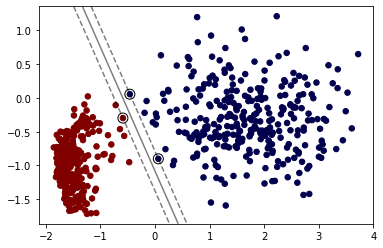

In [126]:
plot_svm_boundary(model,X,y)

# Multiclass classification

## For 25 features

In [127]:
df = pd.read_csv('feat_25.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,2.611354,-0.045663,0.727172,1.595320,-1.271234,-0.690236,-0.599780,-0.171765,-0.410593,0.093257,...,2.305684,-0.638212,0.334267,-0.362362,0.535002,-0.667933,0.853424,0.081133,-0.371929,0.0
1,0.329049,-0.993766,-1.059930,-0.122622,-2.267921,1.807015,-0.372976,0.220776,0.086480,0.898155,...,-0.537503,0.955448,0.881130,0.285619,0.473293,-0.236010,-1.653255,0.530019,0.991707,0.0
2,3.133718,-0.337506,-0.086044,0.236076,-1.600311,0.856172,1.118946,-1.594933,1.067100,0.531846,...,-0.086037,0.108791,0.569087,-1.778828,-0.150031,0.439892,-0.798792,0.008227,0.256486,0.0
3,2.542200,-0.133352,0.657973,0.966862,-2.346200,-0.621942,-0.244499,-0.975664,1.257898,0.605799,...,1.070091,-1.026265,0.894831,-0.572277,0.912929,-0.733433,-0.571943,0.665086,-0.681933,0.0
4,1.748424,0.120212,-1.593389,-0.331676,0.683001,0.053492,0.846797,-0.079228,0.319719,-1.433890,...,1.651151,0.429377,0.281321,0.259342,0.593774,1.207045,1.559338,0.228422,-0.830659,0.0


In [128]:
X = np.array(df.drop(columns=25,axis=1))
y = np.array(df[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [129]:
param_grid1 = {'C': [0.1,1,10,100], 
              'gamma': [0.01,0.1,1],
              'kernel': ['rbf']}

In [130]:
clf = GridSearchCV(SVC(),param_grid=param_grid1, cv=5)

In [131]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.945

In [132]:
clf.best_params_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

In [155]:
train=[]
test=[]
for i in range(10):
    model = SVC(kernel = 'poly',degree=i)
    model.fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))

In [156]:
test

[0.08333333333333333,
 0.89,
 0.9333333333333333,
 0.9266666666666666,
 0.8866666666666667,
 0.8216666666666667,
 0.7283333333333334,
 0.6216666666666667,
 0.46166666666666667,
 0.365]

In [157]:
train

[0.10416666666666667,
 0.9070833333333334,
 0.97875,
 0.98625,
 0.9733333333333334,
 0.94625,
 0.8825,
 0.8158333333333333,
 0.7175,
 0.6470833333333333]

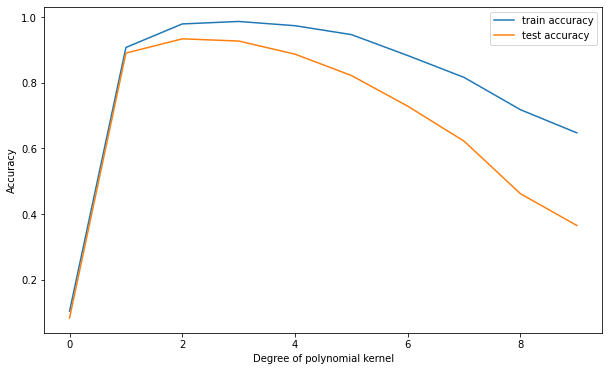

In [158]:
plt.figure(figsize=(10,6))
plt.plot(range(10),train,label='train accuracy')
plt.plot(range(10),test,label='test accuracy')
plt.xlabel('Degree of polynomial kernel')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [159]:
c = [0.001,0.01,0.1,1,10,100,1000]

In [160]:
train=[]
test=[]
for i in c:
    model = SVC(kernel = 'rbf', C=i)
    model.fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))

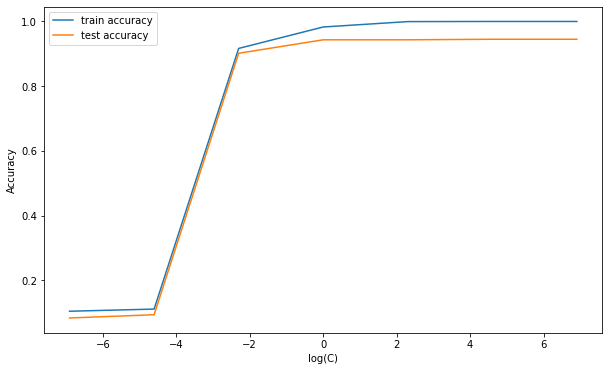

In [164]:
plt.figure(figsize=(10,6))
plt.plot(np.log(c),train,label='train accuracy')
plt.plot(np.log(c),test,label='test accuracy')
plt.xlabel('log(C)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [165]:
gamma = [0.001,0.01,0.1,1,10]

In [166]:
train=[]
test=[]
for i in gamma:
    model = SVC(kernel = 'rbf', gamma=i)
    model.fit(X_train,y_train)
    train.append(model.score(X_train,y_train))
    test.append(model.score(X_test,y_test))

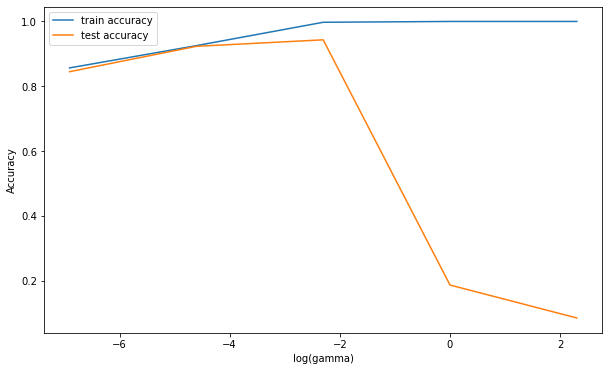

In [167]:
plt.figure(figsize=(10,6))
plt.plot(np.log(gamma),train,label='train accuracy')
plt.plot(np.log(gamma),test,label='test accuracy')
plt.xlabel('log(gamma)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [168]:
print(train,test)

[0.8566666666666667, 0.9254166666666667, 0.9975, 1.0, 1.0] [0.845, 0.9233333333333333, 0.9433333333333334, 0.18666666666666668, 0.085]


## For 10 features

In [97]:
df2 = df[[0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10,25]]
X = np.array(df2.drop(columns=25,axis=1))
y = np.array(df2[25])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [98]:
model = SVC(C=10,gamma=0.1)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8888888888888888

In [99]:
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8922222222222222

In [100]:
clf.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}